In [19]:
import pandas as pd
from covidb.pull import data_pull_csv
from covidb.process import get_todays_data

In [2]:
print("Starting Pull")
data_pull_csv()
print("Finished Pull")
print("Started Processing")
data_dict = get_todays_data()
print("Finished Processing")

Started Processing
Finished Processing


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [4]:
df = data_dict["all_data"]
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths', 'is_full_state', 'county', 'state'],
      dtype='object')

/Users/cullrya/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


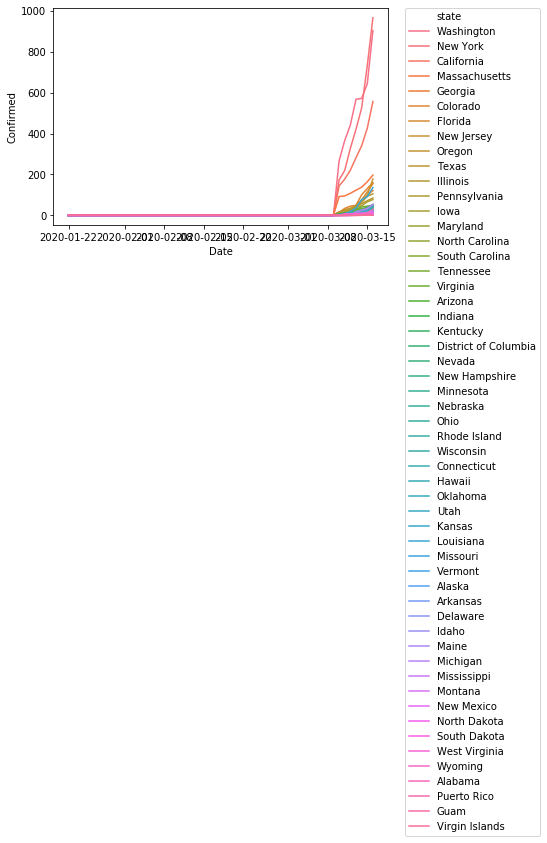

In [5]:
states_df = df.loc[df["is_full_state"] == True]
sns.lineplot(x="Date", y="Confirmed", hue="state", data=states_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

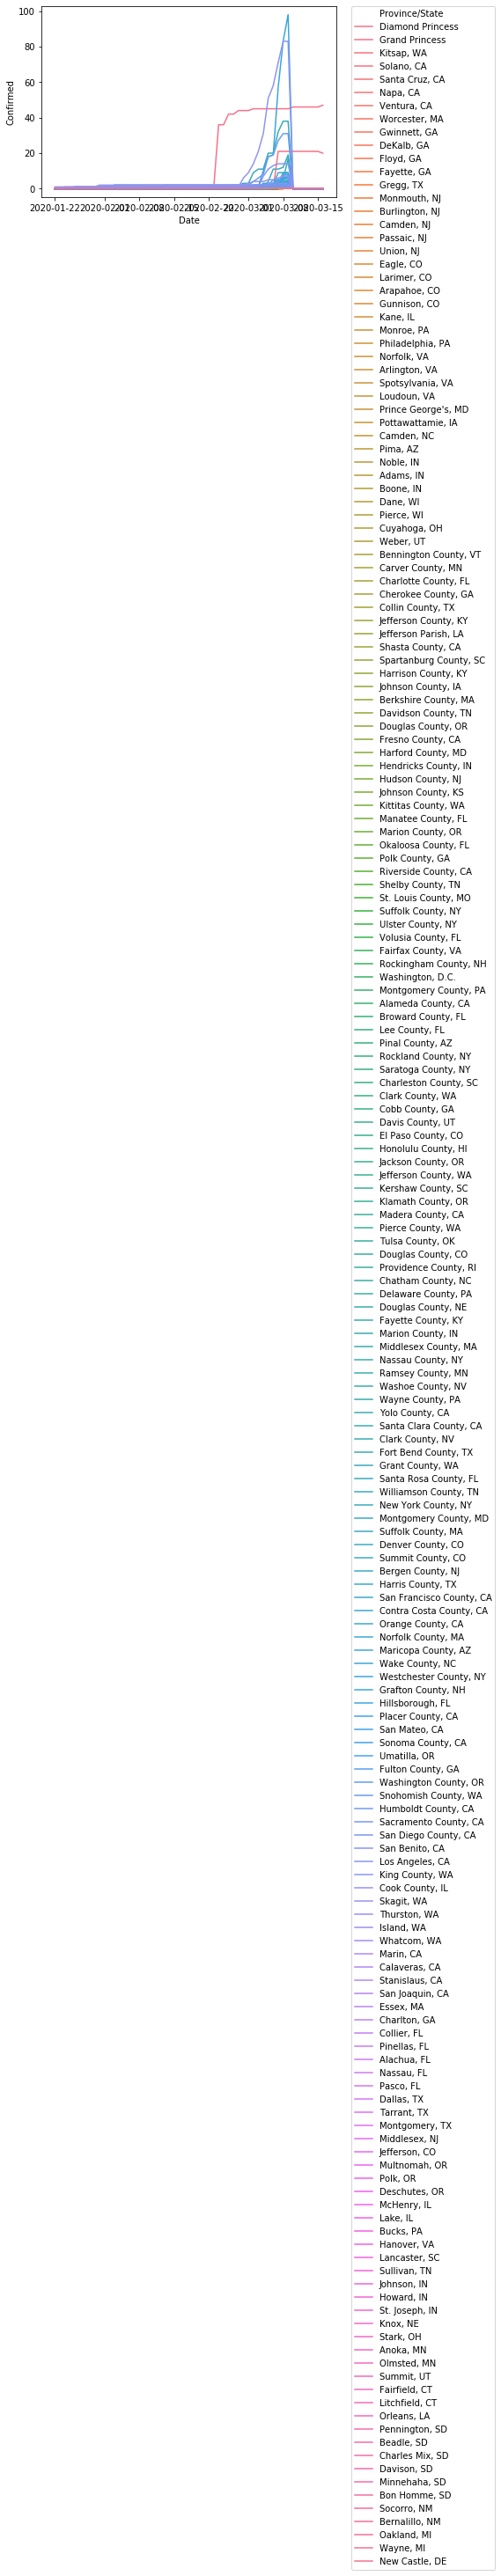

In [6]:
covid_counties_df = df.loc[df["is_full_state"] == False]
sns.lineplot(x="Date", y="Confirmed", hue="Province/State", data=covid_counties_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [11]:
import numpy as np
from covidb.config import COUNTIES_CSV
counties = pd.read_csv(COUNTIES_CSV, sep="\t", dtype = {'fips': str,})
counties = counties.apply(lambda x: x.str.lower())

def get_fips(row):
    county = row.county.lower()
    if "saint " in county or "st. " in county:
        county = county.replace("st. ", "st ").replace("saint ", "st ")
    if "parish" in county or "county" in county:
        county = county.replace(" county", "").replace(" parish", "")
    state = row.state.abbr.lower()
    filt = counties.loc[(counties.county == county) & (counties.state == state)]
    if len(filt):
        return filt.iloc[0].fips
    return np.NaN
    
    
    

covid_counties_df = covid_counties_df.loc[(pd.notna(covid_counties_df["county"])) & pd.notna(covid_counties_df["state"])].reset_index(drop=True)
covid_counties_df["fips"] = covid_counties_df.apply(get_fips, axis=1)



In [17]:
import datetime
covid_counties_df_map = covid_counties_df.loc[
    (covid_counties_df.Confirmed > 0) & \
    (covid_counties_df.Date == datetime.date(year=2020, month=3, day=8)) & \
    (pd.notna(covid_counties_df.fips))
]
covid_counties_df_map.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,is_full_state,county,state,fips
2136,"Bennington County, VT",US,43.0279,-73.1350,2020-03-08,1,0,0,False,Bennington County,Vermont,50003
2741,"Berkshire County, MA",US,42.3118,-73.1822,2020-03-08,1,0,0,False,Berkshire County,Massachusetts,25003
2796,"Davidson County, TN",US,36.1343,-86.8220,2020-03-08,1,0,0,False,Davidson County,Tennessee,47037
2851,"Douglas County, OR",US,43.1261,-123.2492,2020-03-08,1,0,0,False,Douglas County,Oregon,41019
2906,"Fresno County, CA",US,36.9859,-119.2321,2020-03-08,1,0,0,False,Fresno County,California,06019


In [18]:
import plotly.figure_factory as ff

fig = ff.create_choropleth(fips=covid_counties_df_map["fips"], values=covid_counties_df_map["Confirmed"])
fig.layout.template = None
fig.show()

In [14]:
covid_counties_df_bad = covid_counties_df.loc[
    (covid_counties_df.Confirmed > 0) & \
    (covid_counties_df.Date == datetime.date(year=2020, month=3, day=9)) & \
    (pd.isna(covid_counties_df.fips))
]
covid_counties_df_bad.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,is_full_state,county,state,fips
